# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

In [50]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
pd.set_option('display.max_columns', None)


## Step 1: Read in Data

In [2]:
df = pd.read_csv('kc_house_data_train.csv') 
dff = pd.read_csv('kc_house_data_test_features.csv')
t = pd.read_csv('kc_house_data_test_target.csv')

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [3]:
df.head()


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


## Step 3: Clean up any issues with the data like extreme values.  

remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout dataset, and you can't just delete those rows and not have a prediction for it. 

In [4]:
df.shape

(17290, 22)

In [5]:
#Dropping 33 bedrooms
df.drop(df[df.bedrooms == 33].index, inplace = True)
df['floor_round'] = round(df.floors)

# drop rows with missing price 
df.dropna(subset=['price'], inplace=True)

# drop irrelevant columns
df.drop(columns=['zipcode', 'lat', 'long'], inplace=True)


In [6]:
#Dropping 33 bedrooms
dff.drop(df[df.bedrooms == 33].index, inplace = True)
dff['floor_round'] = round(df.floors)

# drop irrelevant columns
dff.drop(columns=['zipcode', 'lat', 'long'], inplace=True)

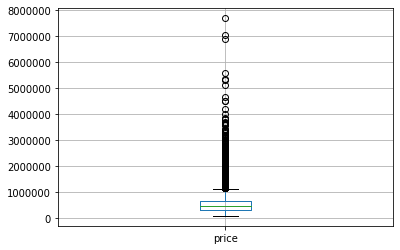

In [7]:
# drop homes that have price 4 standard deviations away from mean
df.boxplot(['price'])

mean = df.price.mean()
std = df.price.std()

df = df[(df.price < (mean + (4 * std))) & (df.price > (mean - (4 * std)))]


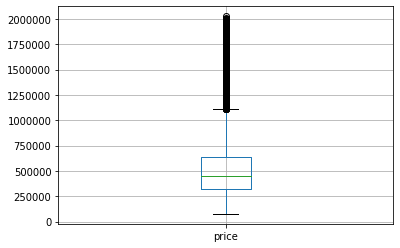

In [8]:
df.boxplot(['price'])

In [9]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,floor_round
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,2390,7700,2.0
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,2370,6283,1.0
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,3710,9685,2.0
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,4050,14226,2.0
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,2250,4050,2.0


## Step 4: Generate new features that you think could be important

After doing this, you will want to go back to steps 2 and 3 to investigates these new features

In [10]:
df['basement'] = np.where(df.sqft_basement > 0, 1, 0)

In [11]:
dff['basement'] = np.where(dff.sqft_basement > 0, 1, 0)

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [12]:
# Creating dummies from bedrooms
df =  pd.get_dummies(df, columns=['floor_round'], drop_first = True )


In [13]:
dff =  pd.get_dummies(dff, columns=['floor_round'], drop_first = True )

In [14]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,basement,floor_round_2.0,floor_round_3.0,floor_round_4.0
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,2390,7700,0,1,0,0
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,2370,6283,1,0,0,0
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,3710,9685,0,1,0,0
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,4050,14226,0,1,0,0
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,2250,4050,0,1,0,0


### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [15]:
# Changing date column type to pandas datetime
df.date  = pd.to_datetime(df.date)
df['age_when_sold'] = pd.DatetimeIndex(df['date']).year - df['yr_built']


In [16]:
dff.date  = pd.to_datetime(dff.date)
dff['age_when_sold'] = pd.DatetimeIndex(dff['date']).year - dff['yr_built']

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column

In [17]:
#your code here
df['age'] = 2016 - df['yr_built']
df['updated'] = np.where(df.yr_renovated > 1, 1,0)
df['new_house'] = np.where(df.yr_built > 2000, 1, 0)


In [18]:
dff['age'] = 2016 - dff['yr_built']
dff['updated'] = np.where(dff.yr_renovated > 1, 1,0)
dff['new_house'] = np.where(dff.yr_built > 2000, 1, 0)

### Non-linear transformations

### 4.4) Create a polynomial feature for two of your continuous variables


In [19]:
# your code here 
#'sqft_living', 'sqft_lot'
#df_cont = df[['sqft_living', 'sqft_lot']]
#poly = PolynomialFeatures(degree=2, include_bias=False)
#poly_data = poly.fit_transform(df_cont)
#poly_columns = poly.get_feature_names(df_cont.columns)
#df_poly = pd.DataFrame(poly_data, columns=poly_columns)
#df_poly.head()

df['sqft_living^2'] = df['sqft_living']**2
df['sqft_lot^2'] = df['sqft_lot']**2
df['sqft_living_sqft_lot'] = df['sqft_living'] * df['sqft_lot']


In [20]:
dff['sqft_living^2'] = dff['sqft_living']**2
dff['sqft_lot^2'] = dff['sqft_lot']**2
dff['sqft_living_sqft_lot'] = dff['sqft_living'] * dff['sqft_lot']

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable) 

In [21]:
# your code here
#df_dummy_cont = df[['sqft_living', 'basement']]
#poly2 = PolynomialFeatures(degree=2, include_bias=False)
#poly2_data = poly.fit_transform(df_dummy_cont)
#poly2_columns = poly.get_feature_names(df_dummy_cont.columns)
#df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
#df_poly2.head()

df['basement^2'] = df['basement']**2
df['sqft_living_basement'] = df['sqft_living'] * df['basement']


In [22]:
dff['basement^2'] = dff['basement']**2
dff['sqft_living_basement'] = dff['sqft_living'] * dff['basement']

## Step 5: Train Test Split

If you plan on doing any sclaing of your data, make sure it is doen at the apporpriate time. 

### 5.1) Perform a train test split of the data.

In [23]:
features=['bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'basement',
       'floor_round_2.0', 'floor_round_3.0', 'floor_round_4.0',
       'age_when_sold', 'age', 'updated', 'new_house','sqft_living^2',
       'sqft_lot^2', 'sqft_living_sqft_lot','basement^2',
       'sqft_living_basement']

df_features = df[features]
dff_features = dff[features]

target = df['price']

In [24]:
#your code here 
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.2)

### 5.2) Fit your scaler to training the data.

In [25]:
#your code here 
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)


### 5.3) Transform the testing set with the scaler.

In [26]:
#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

### 5.4) Fit the model to the training data.

In [27]:
#your code here 
lm = LinearRegression()
lm = lm.fit(X_train, y_train)


### 5.5) Use the model to predict on the training set and the test set.

In [28]:
#your code here 
y_train_pred = lm.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Training Root Mean Squared Error:' , train_rmse)

y_pred = lm.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Testing Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 166354.1182839346
Testing Root Mean Squared Error: 171431.7583416772


### 5.6) Evaluate the training and test predictions using RMSE.

In [29]:
#your code here 
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  166354 vs. Testing:  171431


### 5.7) Determine if your model is overfit.

Text(0, 0.5, 'Predictions')

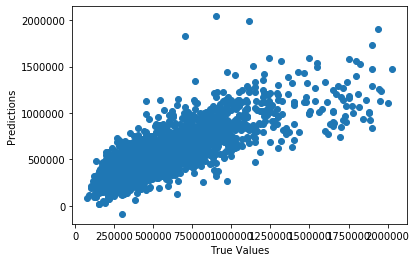

In [30]:
#your code here 
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models

### 6.1) Utilize a filter method to identify some features to remove from the model.  

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,basement,floor_round_2.0,floor_round_3.0,floor_round_4.0,age_when_sold,age,updated,new_house,sqft_living^2,sqft_lot^2,sqft_living_sqft_lot,basement^2,sqft_living_basement
bedrooms,NaN,0.516708,0.593050,0.023680,0.172869,0.019313,0.071775,0.015090,0.358221,0.480746,0.301759,0.011556,0.396928,0.024421,0.162888,0.246671,0.079259,0.024665,0.162010,0.161852,0.011246,0.069774,0.516991,0.007657,0.083995,0.162888,0.293789
bathrooms,NaN,NaN,0.742031,0.088937,0.502679,0.020956,0.153259,0.133597,0.648960,0.668782,0.254032,0.039019,0.555085,0.090984,0.154423,0.437676,0.086081,0.000150,0.522457,0.522030,0.038454,0.384339,0.681340,0.044137,0.183368,0.154423,0.312909
sqft_living,NaN,NaN,NaN,0.178998,0.357186,0.042522,0.239651,0.069987,0.749973,0.867232,0.404884,0.039255,0.754315,0.187620,0.194367,0.395822,0.055350,0.002553,0.338400,0.337829,0.038984,0.226637,0.962142,0.071541,0.297899,0.194367,0.440154
sqft_lot,NaN,NaN,NaN,NaN,0.006724,0.014912,0.062183,0.016493,0.117467,0.192911,0.003281,0.009445,0.146348,0.695210,0.044844,0.022584,0.042097,0.006192,0.059245,0.059284,0.009540,0.038414,0.197027,0.819181,0.896562,0.044844,0.004385
floors,NaN,NaN,NaN,NaN,NaN,0.007497,0.006556,0.267172,0.458825,0.535261,0.269494,0.000649,0.283212,0.012675,0.267176,0.750282,0.472438,0.071574,0.488177,0.487795,0.000720,0.535761,0.320902,0.014465,0.053667,0.267176,0.171709
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,0.357598,0.001644,0.038867,0.024776,0.039437,0.099409,0.042473,0.026682,0.022003,0.005441,0.011325,0.001436,0.035632,0.035659,0.099832,0.028747,0.041523,0.002113,0.013698,0.022003,0.037743
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.039572,0.211218,0.119579,0.259104,0.078227,0.249423,0.063730,0.182784,0.006216,0.001919,0.004742,0.056343,0.056467,0.078410,0.050603,0.243584,0.029973,0.078540,0.182784,0.275938
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.151914,0.168362,0.169387,0.055615,0.100981,0.003009,0.127551,0.188061,0.097708,0.012145,0.362303,0.363018,0.055086,0.318800,0.073314,0.019810,0.024835,0.127551,0.124794
grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.744384,0.131059,0.000906,0.705169,0.116969,0.036388,0.400690,0.076123,0.003018,0.462166,0.461489,0.001307,0.298934,0.711780,0.047763,0.213142,0.036388,0.202080
sqft_above,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.104139,0.009574,0.727748,0.199081,0.239205,0.560523,0.012787,0.004103,0.441660,0.441172,0.009460,0.327822,0.840319,0.085564,0.296116,0.239205,0.021213


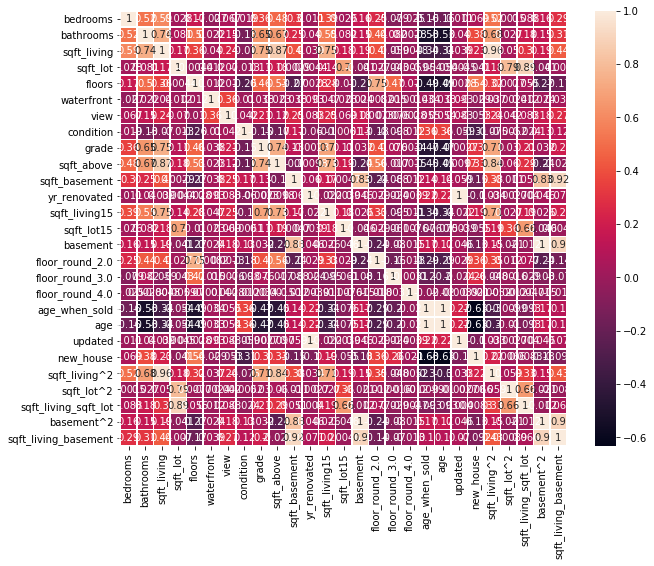

In [31]:
# your code here
plt.figure(figsize=(10, 8))
sns.heatmap(df_features.corr(), annot=True,linewidths = 0.5)
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

In [32]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

df_features.drop(columns= to_drop, inplace = True)
dff_features.drop(columns= to_drop, inplace = True)

/Users/singh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### 6.2) After removing the features, rerun steps 5 and see if you r new model performs better than the old model.

Training Root Mean Squared Error: 167906.57222779893
Testing Root Mean Squared Error: 172305.51225177545
Training:  167906 vs. Testing:  172305


0.6430324758042252

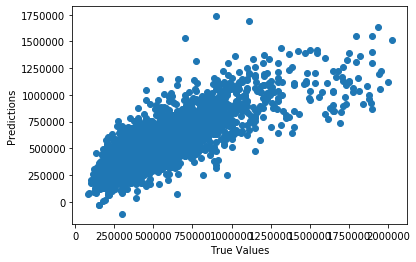

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.2)
# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)
lm = LinearRegression()
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Training Root Mean Squared Error:' , train_rmse)

y_pred = lm.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Testing Root Mean Squared Error:' , test_rmse)

print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

lm.score(X_test, y_test)

## Step 7: Evaluate your different models in order to determine the best model overall

## Step 8:  Refit your best model to the entire dataset

In [53]:
scaler.fit(df_features)
lm = LinearRegression()
lm = lm.fit(df_features, target)

pred = lm.predict(dff_features)
lm.score(df_features, target)

filename = 'finalized_model.sav'
pickle.dump(lm, open(filename, 'wb'))


In [55]:
rmse = np.sqrt(metrics.mean_squared_error(t['price'], pred))

print('RMSE: ' ,rmse)



loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(df_features, target)
print(result)

RMSE:  228816.1484426116
0.6545421788341008


## Step 9: Save your final model using pickle

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/